In [37]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

In [2]:
df = pd.read_excel('data_ptpn.xlsx')

In [3]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,...,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EngangementSurveyRound,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,A Ridwan,10001,Belum Menikah,Single,L,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,...,N/A-StillEmployed,Active,LinkedIn,4.60,5,5,0,2020-01-17,0,1
1,Ade Setyanto,10002,Belum Menikah,Single,L,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,...,career change,Voluntarily Terminated,Indeed,4.96,5,3,6,2017-02-24,0,17
2,Adhitya Bramantya Ranggatyasta,10003,Menikah,Pernah Menikah/Bercerai,P,TKP/ Outsource,Product Owner,Senior,Average,ENT,...,hours,Voluntarily Terminated,LinkedIn,3.02,3,3,0,2013-05-15,0,3
3,Adji Wijaya Kusuma,10004,Belum Menikah,Single,P,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,...,N/A-StillEmployed,Active,Indeed,4.84,5,5,0,2020-01-03,0,15
4,Agus Andri Putra,10005,Belum Menikah,Single,P,Prohire,Business Analyst,Middle,Average,EDU,...,return to school,Voluntarily Terminated,Google Search,5.00,5,4,0,2017-02-01,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Yusril Firza,10283,Belum Menikah,Single,L,TKP/ Outsource,Back End Developer,Middle,Fully meets,EDU,...,N/A-StillEmployed,Active,Indeed,4.10,4,3,0,2020-01-04,0,6
283,Yusril Iqbal,10284,Menikah,Widowed,P,TKP/ Outsource,Back End Developer,Junior,Average,LGT,...,N/A-StillEmployed,Active,LinkedIn,2.44,2,5,0,2020-02-11,4,18
284,Zahrah,10285,Belum Menikah,Single,L,TKP/ Outsource,Front End Developer,Junior,Exceed,EDU,...,medical issues,Voluntarily Terminated,CareerBuilder,5.00,5,3,5,2016-04-15,0,11
285,Zharfan Nugraha Permadi,10286,Menikah,Married,L,TKP/ Outsource,Back End Developer,Junior,Exceed,EDU,...,medical issues,Voluntarily Terminated,Diversity Job Fair,4.60,5,3,4,2018-02-12,0,9


In [5]:
df.describe()

,EmpID,EngagementSurvey,EngangementSurveyRound,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,287.000000,287.000000,287.00000,287.000000,287.000000,287.000000,287.000000
mean,10144.000000,4.112300,4.12892,3.895470,1.181185,0.411150,10.191638
std,82.993976,0.794004,0.88939,0.910053,2.290585,1.273018,5.930383
min,10001.000000,1.120000,1.00000,1.000000,0.000000,0.000000,1.000000
25%,10072.500000,3.700000,4.00000,3.000000,0.000000,0.000000,5.000000
50%,10144.000000,4.280000,4.00000,4.000000,0.000000,0.000000,10.000000
75%,10215.500000,4.700000,5.00000,5.000000,0.000000,0.000000,15.000000
max,10287.000000,5.000000,5.00000,5.000000,8.000000,6.000000,20.000000


In [7]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
RoleID                          0
LevelID                         0
PerfScoreID                     0
Tribe                           0
Squad                           0
DOB                             0
RaceDesc                        0
DateofHire                      0
DateofTermination             194
TermReason                      0
EmploymentStatus                0
RecruitmentSource               0
EngagementSurvey                0
EngangementSurveyRound          0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
dtype: int64

In [9]:
df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                             object
MaritalStatusID                       object
GenderID                              object
EmpStatusID                           object
RoleID                                object
LevelID                               object
PerfScoreID                           object
Tribe                                 object
Squad                                 object
DOB                                   object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                            object
EmploymentStatus                      object
RecruitmentSource                     object
EngagementSurvey                     float64
EngangementSurveyRound                 int64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerfor

In [10]:
df2 = df['RoleID']
df2

0            Product Owner
1            Product Owner
2            Product Owner
3         Business Analyst
4         Business Analyst
              ...         
282     Back End Developer
283     Back End Developer
284    Front End Developer
285     Back End Developer
286    Front End Developer
Name: RoleID, Length: 287, dtype: object

In [11]:
df2.describe()

count                    287
unique                    16
top       Back End Developer
freq                     107
Name: RoleID, dtype: object

<AxesSubplot:ylabel='RoleID'>

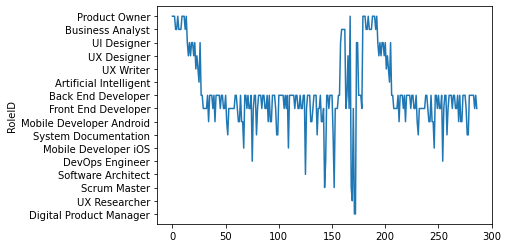

In [15]:
sns.lineplot(data=df2)

In [20]:
df2 = df['PerfScoreID']

In [21]:
df2.describe()

count         287
unique          5
top       Average
freq           85
Name: PerfScoreID, dtype: object

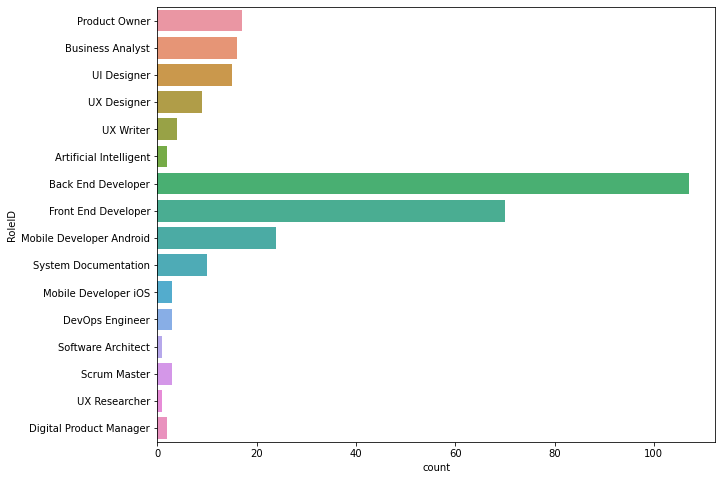

In [24]:
sebar = df['RoleID'].value_counts()
sebar

# Visualisasikan kolom primaryCategories
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(y=df.RoleID)

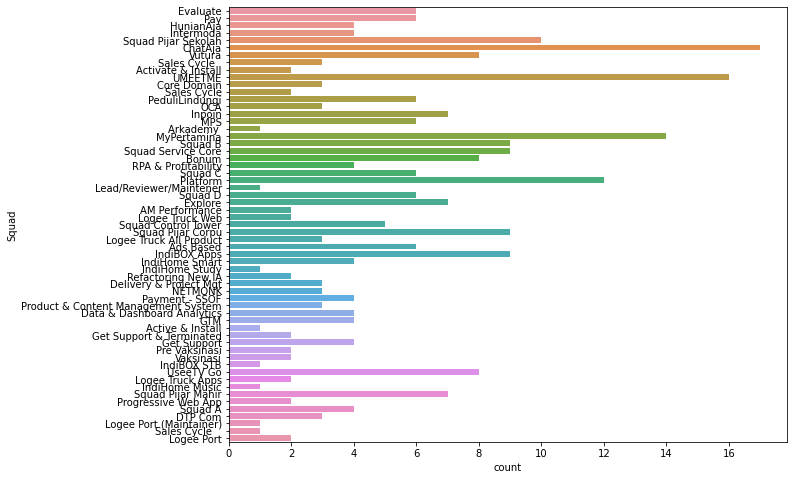

In [28]:
sebar = df['Squad'].value_counts()
sebar

# Visualisasikan kolom primaryCategories
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(y=df.Squad)

In [34]:
data1 = df[['RoleID','Tribe','Squad']]
data1

,RoleID,Tribe,Squad
0,Product Owner,EWD,Evaluate
1,Product Owner,EWD,Pay
2,Product Owner,ENT,HunianAja
3,Business Analyst,ENT,Intermoda
4,Business Analyst,EDU,Squad Pijar Sekolah
...,...,...,...
282,Back End Developer,EDU,Squad Pijar Corpu
283,Back End Developer,LGT,Logee Port
284,Front End Developer,EDU,Squad Pijar Mahir
285,Back End Developer,EDU,Squad Pijar Mahir


In [38]:
#Membangun model menggunakan SVD
reader = Reader()
data = Dataset.load_from_df(df[['RoleID','Squad','Tribe']], reader)

# Train & Test
trainset, testset = train_test_split(data, test_size=0.20, random_state=50)

ValueError: could not convert string to float: 'EWD'